In [2]:


import pandas as pd
import os
import openpyxl  # openpyxl 라이브러리 추가

try:
    # 현재 파일 경로 가져오기 (Jupyter Notebook 환경에서는 __file__을 사용할 수 없음)
    current_dir = '/Users/pjh_air/Desktop/bootcamp/1203 학원에서한거'
    
    # 엑셀 파일 경로 설정
    excel_path = os.path.join(current_dir, '서울시 문화행사 정보 2.xlsx')
    
    # 엑셀 파일 읽어오기
    df = pd.read_excel(excel_path, engine='openpyxl')  # openpyxl 엔진 지정
    print("데이터 로드 완료") 
    print(f"데이터 크기: {df.shape}")
    
    # 데이터 확인
    print(df.head())
    
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except Exception as e:
    print(f"오류가 발생했습니다: {str(e)}")


데이터 로드 완료
데이터 크기: (5552, 22)
      분류  자치구                                             공연/행사명  \
0  전시/미술  강남구                                K-일러스트레이션페어 서울 2025   
1  교육/체험  강서구                       [겸재정선미술관] 2025 명사석학 미술인문학 강좌   
2  교육/체험  강서구  [겸재정선미술관] 2025 겸재 문화학교 강좌 [풍속화의 진수성찬: 조선 문화를 엿보다]   
3  전시/미술  노원구                 [노원구청] 뉴욕의 거장들: 잭슨 폴록과 마크 로스코의 친구들   
4    클래식  강남구                  첼리스트 신호철이 해설해주는 [앙상블 플레이리스트 Ep.3]   

                   날짜/시간                장소   기관명           이용대상  \
0  2025-02-06~2025-02-09  서울 삼성동 코엑스 3층 D홀    기타            누구나   
1  2025-01-24~2025-12-19   겸재정선미술관 3층 다목적실  강서구청  일반 성인 100명 내외   
2  2025-01-17~2025-12-12   겸재정선미술관 3층 다목적실  강서구청   일반 성인 80명 내외   
3  2025-01-10~2025-07-12       노원문화예술회관 4층  노원구청            누구나   
4  2025-01-05~2025-01-05             거암아트홀    기타            누구나   

                                                이용요금  \
0  사전 예매가 : ~ 2025년 1월 31일(금)까지 결제 시 8,000원ㅣ현장 구매...   
1                                     50,000원 (

In [3]:
# 컬럼명 확인
print("데이터프레임의 컬럼명:", df.columns.tolist())

try:
    # '유료' 행 제외 시도
    df = df[df['이용요금'] != '유료']
    print("'유료' 행 제외 완료")
    print(f"변경된 데이터 크기: {df.shape}")
    
    # 변경된 데이터 확인
    print(df.head())
except KeyError:
    print("'이용요금' 컬럼이 데이터프레임에 존재하지 않습니다.")
    print("사용 가능한 컬럼을 확인해주세요.")


데이터프레임의 컬럼명: ['분류', '자치구', '공연/행사명', '날짜/시간', '장소', '기관명', '이용대상', '이용요금', '출연자정보', '프로그램소개', '기타내용', '홈페이지?주소', '대표이미지', '신청일', '시민/기관', '시작일', '종료일', '테마분류', '경도(X좌표)', '위도(Y좌표)', '유무료', '문화포털상세URL']
'유료' 행 제외 완료
변경된 데이터 크기: (5552, 22)
      분류  자치구                                             공연/행사명  \
0  전시/미술  강남구                                K-일러스트레이션페어 서울 2025   
1  교육/체험  강서구                       [겸재정선미술관] 2025 명사석학 미술인문학 강좌   
2  교육/체험  강서구  [겸재정선미술관] 2025 겸재 문화학교 강좌 [풍속화의 진수성찬: 조선 문화를 엿보다]   
3  전시/미술  노원구                 [노원구청] 뉴욕의 거장들: 잭슨 폴록과 마크 로스코의 친구들   
4    클래식  강남구                  첼리스트 신호철이 해설해주는 [앙상블 플레이리스트 Ep.3]   

                   날짜/시간                장소   기관명           이용대상  \
0  2025-02-06~2025-02-09  서울 삼성동 코엑스 3층 D홀    기타            누구나   
1  2025-01-24~2025-12-19   겸재정선미술관 3층 다목적실  강서구청  일반 성인 100명 내외   
2  2025-01-17~2025-12-12   겸재정선미술관 3층 다목적실  강서구청   일반 성인 80명 내외   
3  2025-01-10~2025-07-12       노원문화예술회관 4층  노원구청            누구나   
4  2025-01-05~2025

In [4]:
# 무료 행사 개수 확인
무료_행사_수 = len(df[df['이용요금'] == '무료'])
print(f"무료 행사 수: {무료_행사_수}개")


무료 행사 수: 419개


In [19]:
# 무료 행사만 필터링
무료_행사_df = df[df['이용요금'] == '무료']

# 표 형태로 시각화
from IPython.display import display

# 데이터프레임의 실제 컬럼명 확인
print("사용 가능한 컬럼:", df.columns.tolist())

# 필요한 컬럼만 선택하여 표시 (실제 컬럼명으로 수정 필요)
표시할_컬럼 = ['이용요금', '자치구']  # 확인된 컬럼만 우선 사용
display(무료_행사_df[표시할_컬럼])

print(f"\n총 {len(무료_행사_df)}개의 무료 행사가 있습니다.")


사용 가능한 컬럼: ['분류', '자치구', '공연/행사명', '날짜/시간', '장소', '기관명', '이용대상', '이용요금', '출연자정보', '프로그램소개', '기타내용', '홈페이지?주소', '대표이미지', '신청일', '시민/기관', '시작일', '종료일', '테마분류', '경도(X좌표)', '위도(Y좌표)', '유무료', '문화포털상세URL']


,이용요금,자치구
6,무료,종로구
96,무료,종로구
128,무료,은평구
209,무료,관악구
212,무료,금천구
...,...,...
5478,무료,종로구
5489,무료,종로구
5512,무료,강동구
5519,무료,중랑구



총 419개의 무료 행사가 있습니다.


In [20]:
# 자치구별 무료 행사 수 계산
구별_무료행사 = 무료_행사_df.groupby('자치구').size()

# 결과를 데이터프레임으로 변환하고 내림차순 정렬
구별_무료행사_df = pd.DataFrame(구별_무료행사, columns=['행사수'])
구별_무료행사_df = 구별_무료행사_df.sort_values('행사수', ascending=False)

# 결과 출력
print("자치구별 무료 행사 수:")
print(구별_무료행사_df)


자치구별 무료 행사 수:
      행사수
자치구      
종로구   100
중구     36
성동구    36
송파구    29
서초구    25
노원구    22
용산구    14
관악구    14
성북구    14
은평구    11
강남구    11
금천구    10
광진구    10
동대문구    9
도봉구     9
서대문구    8
강동구     7
강북구     7
영등포구    6
중랑구     5
구로구     5
마포구     4
양천구     3
강서구     2
동작구     1



=== 분류 및 자치구별 무료 행사 수 ===
----------------------------------------------------------------------
  1. 교육/체험                | 종로구        |  45개
  2. 전시/미술                | 종로구        |  33개
  3. 교육/체험                | 성동구        |  29개
  4. 교육/체험                | 송파구        |  17개
  5. 교육/체험                | 노원구        |  13개
  6. 전시/미술                | 중구         |  13개
  7. 전시/미술                | 서초구        |  10개
  8. 교육/체험                | 관악구        |  10개
  9. 교육/체험                | 금천구        |   7개
 10. 축제-기타                | 종로구        |   7개
----------------------------------------------------------------------
 11. 교육/체험                | 용산구        |   6개
 12. 영화                   | 성북구        |   6개
 13. 전시/미술                | 서대문구       |   6개
 14. 축제-문화/예술             | 중구         |   6개
 15. 교육/체험                | 서초구        |   6개
 16. 교육/체험                | 광진구        |   6개
 17. 전시/미술                | 강남구        |   5개
 18. 전시/미술                | 송파구        |   5개
 19

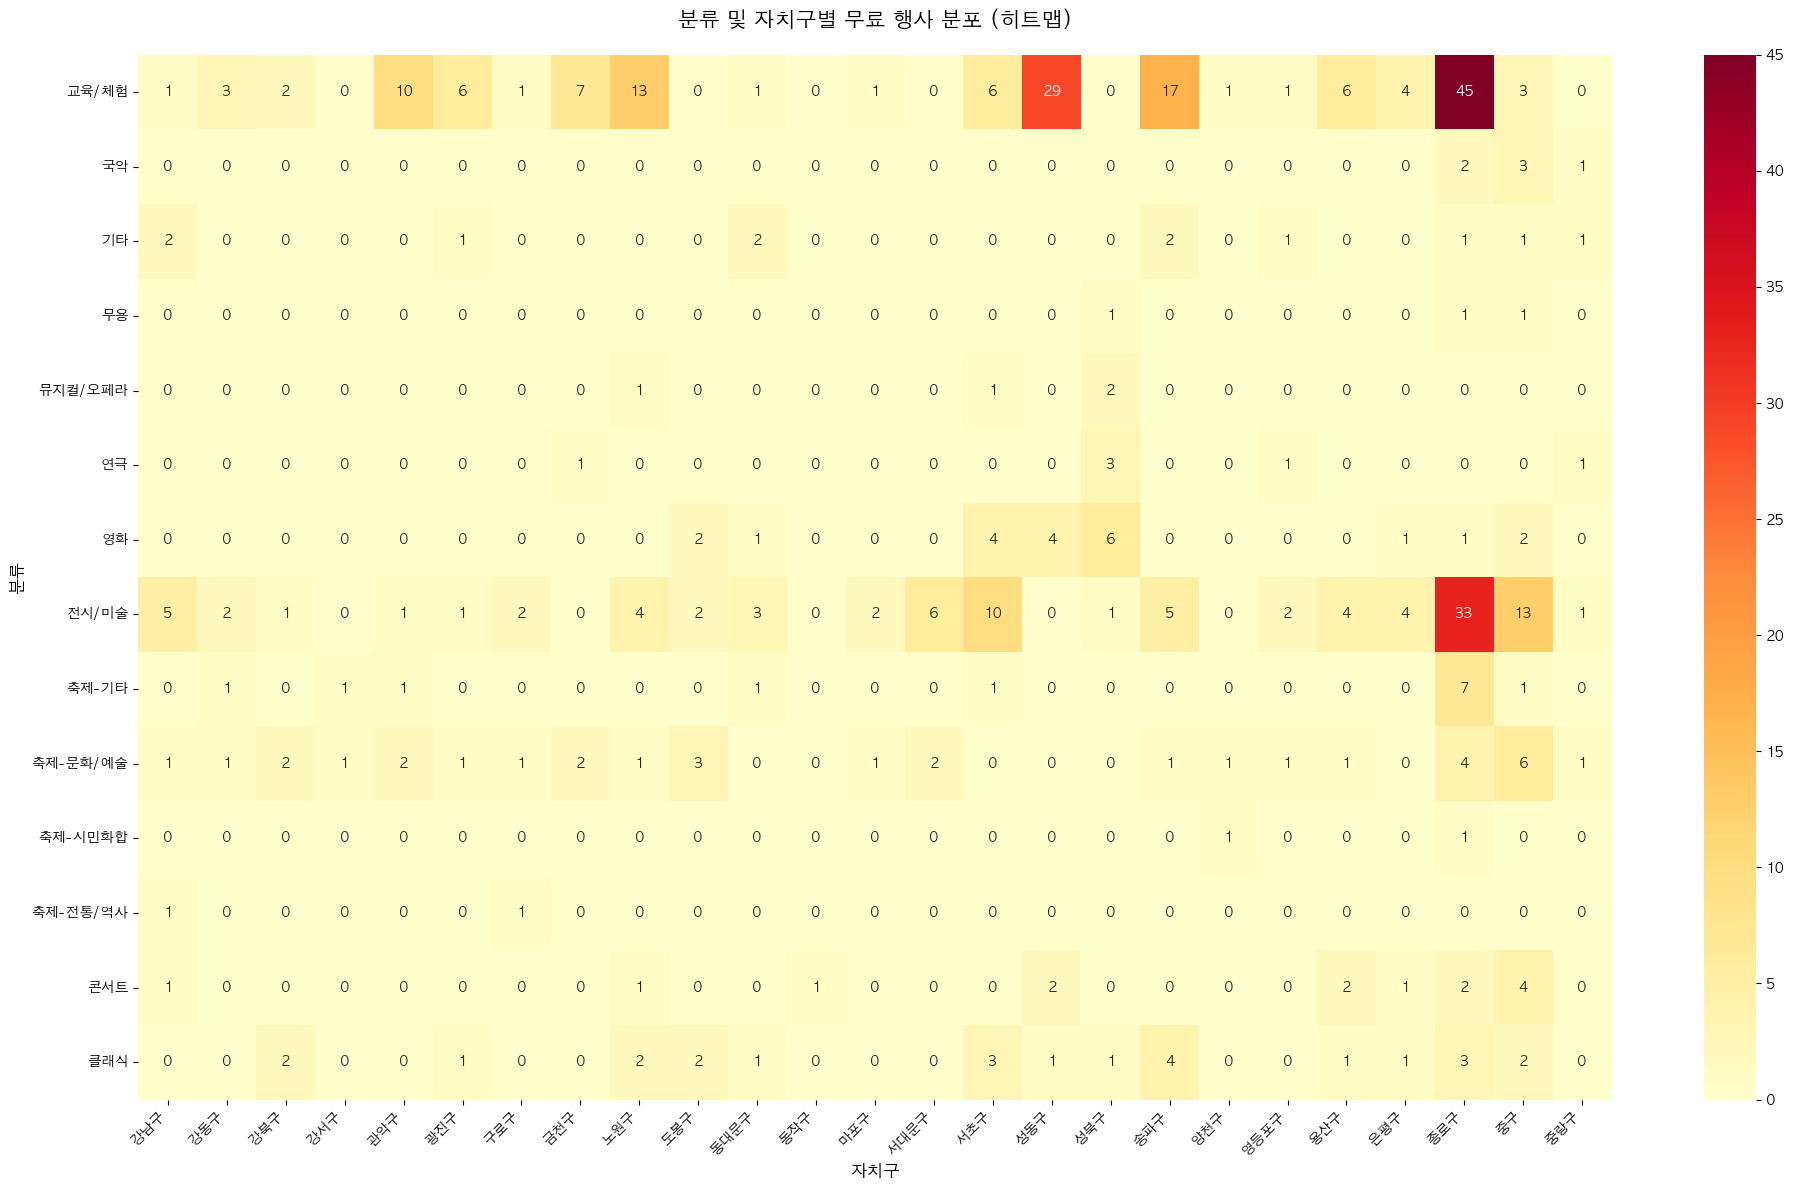

<Figure size 1500x800 with 0 Axes>

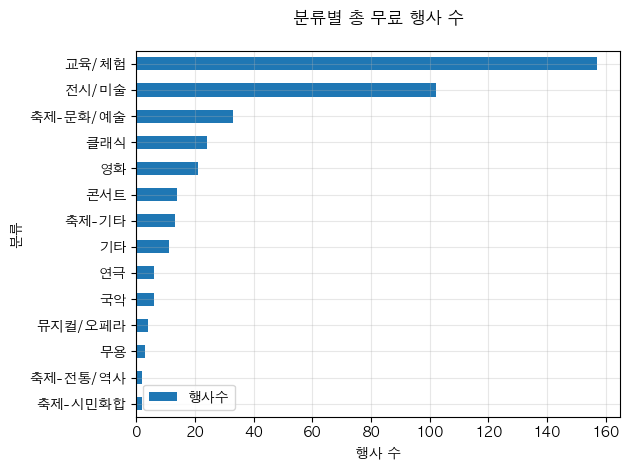

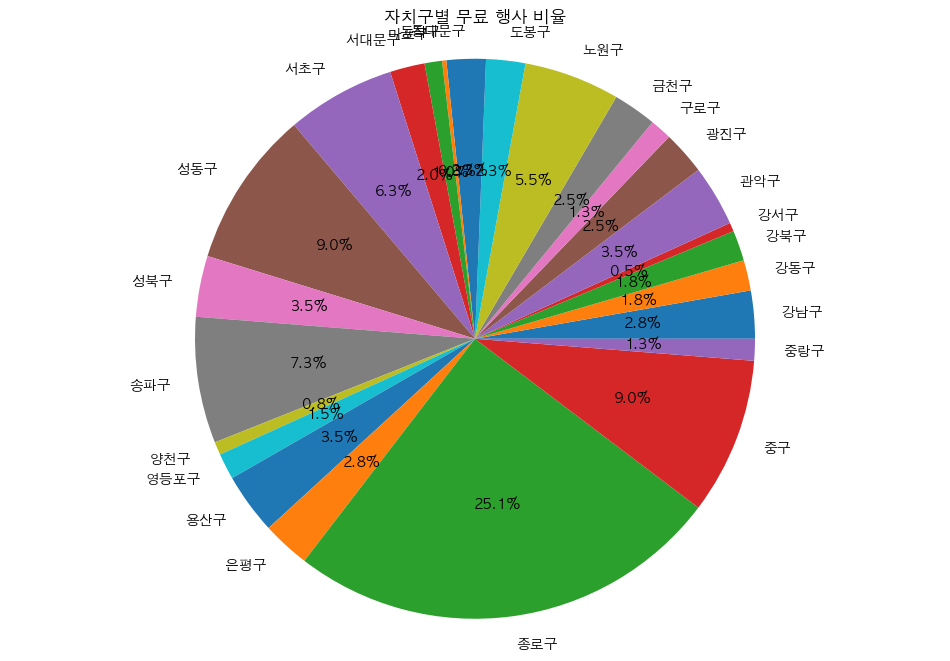

<Figure size 1500x800 with 0 Axes>

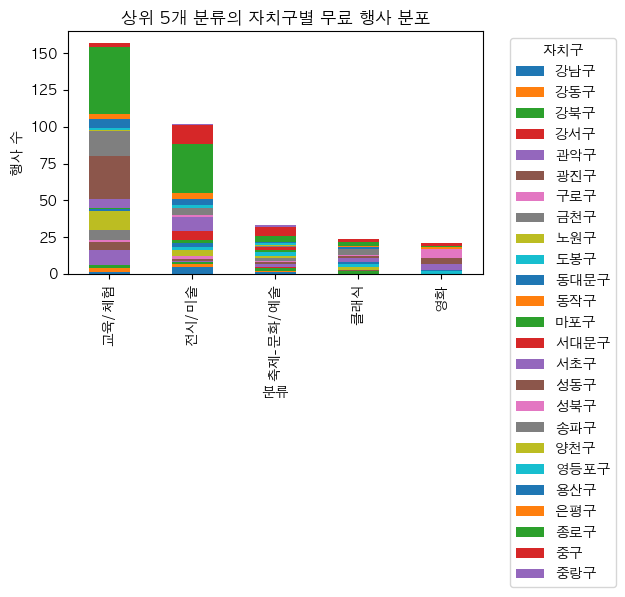

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_2477/3101737999.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  무료_행사_df['월'] = pd.to_datetime(무료_행사_df['시작일']).dt.month


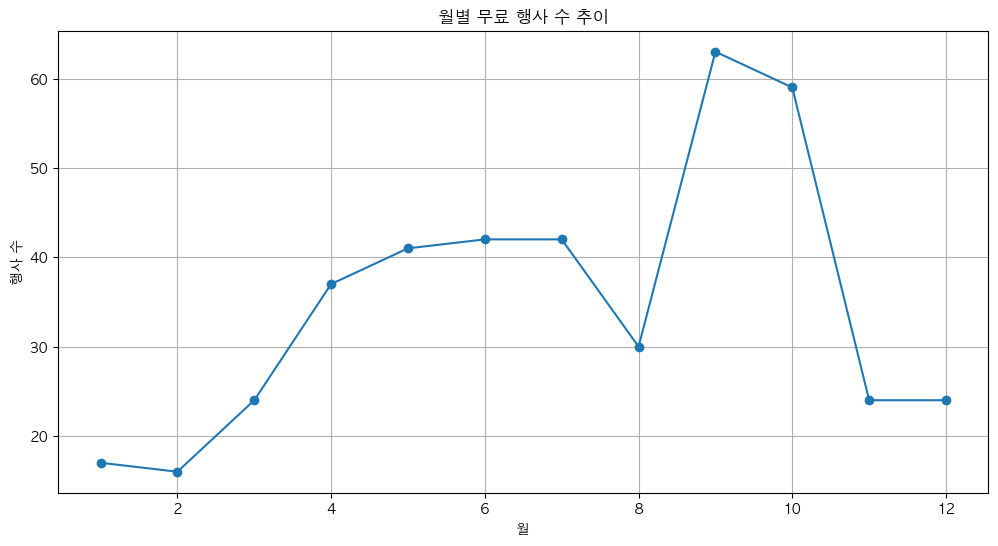

In [26]:
# 분류와 자치구별 무료 행사 수 계산
분류_자치구별_무료행사 = 무료_행사_df.groupby(['분류', '자치구']).size()

# 결과를 데이터프레임으로 변환하고 내림차순 정렬
분류_자치구별_무료행사_df = pd.DataFrame(분류_자치구별_무료행사, columns=['행사수'])
분류_자치구별_무료행사_df = 분류_자치구별_무료행사_df.sort_values('행사수', ascending=False)

# 결과를 보기 좋게 출력
print("\n=== 분류 및 자치구별 무료 행사 수 ===")
print("-" * 70)

# 모든 결과를 표시하고 보기 좋게 포맷팅
for idx, row in enumerate(분류_자치구별_무료행사_df.itertuples(), 1):
    분류 = row.Index[0]  # 첫 번째 인덱스 레벨 (분류)
    자치구 = row.Index[1]  # 두 번째 인덱스 레벨 (자치구)
    행사수 = row.행사수
    print(f"{idx:3d}. {str(분류):<20} | {str(자치구):<10} | {행사수:>3d}개")
    if idx % 10 == 0:
        print("-" * 70)

print("-" * 70)
print(f"\n총 {len(분류_자치구별_무료행사_df)}개의 분류-자치구 조합이 있습니다.")

# matplotlib과 seaborn 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 1. 히트맵 시각화
plt.figure(figsize=(20, 12))
pivot_table = pd.pivot_table(무료_행사_df, 
                           values='이용요금',
                           index='분류',
                           columns='자치구',
                           aggfunc='count',
                           fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title('분류 및 자치구별 무료 행사 분포 (히트맵)', pad=20, fontsize=15)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('분류', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. 분류별 총 행사 수 수평 막대 그래프
plt.figure(figsize=(15, 8))
분류별_합계 = 분류_자치구별_무료행사_df.groupby(level=0).sum()
분류별_합계.sort_values('행사수', ascending=True).plot(kind='barh')
plt.title('분류별 총 무료 행사 수', pad=20)
plt.xlabel('행사 수')
plt.ylabel('분류')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 자치구별 무료 행사 수 원형 그래프
plt.figure(figsize=(12, 8))
자치구별_합계 = 분류_자치구별_무료행사_df.groupby(level=1).sum()
plt.pie(자치구별_합계['행사수'], labels=자치구별_합계.index, autopct='%1.1f%%')
plt.title('자치구별 무료 행사 비율')
plt.axis('equal')
plt.show()

# 4. 상위 5개 분류의 자치구별 분포 (스택 막대 그래프)
top_5_분류 = 분류별_합계.nlargest(5, '행사수').index
top_5_pivot = pivot_table.loc[top_5_분류]
plt.figure(figsize=(15, 8))
top_5_pivot.plot(kind='bar', stacked=True)
plt.title('상위 5개 분류의 자치구별 무료 행사 분포')
plt.xlabel('분류')
plt.ylabel('행사 수')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. 시계열 트렌드 (월별 행사 수)
if '시작일' in 무료_행사_df.columns:
    무료_행사_df['월'] = pd.to_datetime(무료_행사_df['시작일']).dt.month
    월별_행사수 = 무료_행사_df.groupby('월').size()
    
    plt.figure(figsize=(12, 6))
    월별_행사수.plot(kind='line', marker='o')
    plt.title('월별 무료 행사 수 추이')
    plt.xlabel('월')
    plt.ylabel('행사 수')
    plt.grid(True)
    plt.show()


/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_5006/4140984319.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  무료_행사_df.loc[:, '행사기간'] = (pd.to_datetime(무료_행사_df['종료일']) -


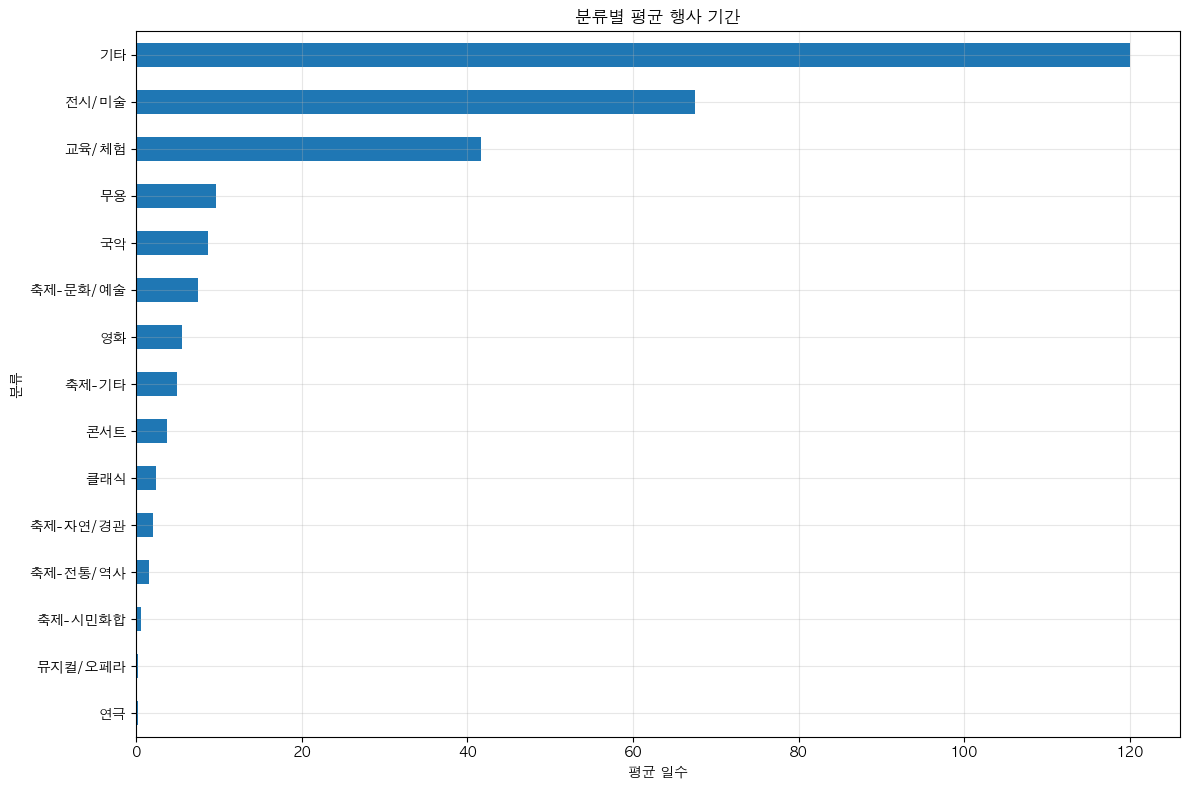

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_5006/4140984319.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  무료_행사_df.loc[:, '요일'] = pd.to_datetime(무료_행사_df['시작일']).dt.dayofweek
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_5006/4140984319.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  무료_행사_df.loc[:, '주말여부'] = 무료_행사_df['요일'].apply(lambda x: '주말' if x >= 5 else '평일')


<Figure size 1500x800 with 0 Axes>

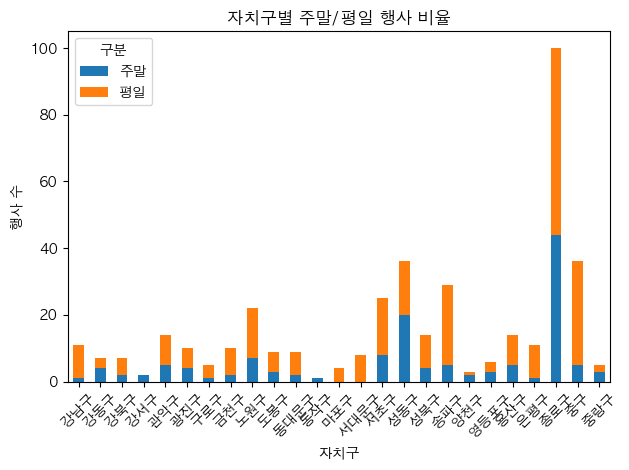

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_5006/4140984319.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  무료_행사_df.loc[:, '월'] = pd.to_datetime(무료_행사_df['시작일']).dt.month


<Figure size 1500x800 with 0 Axes>

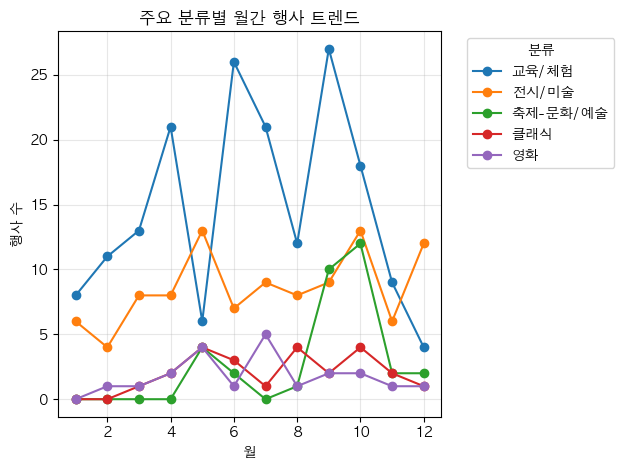

In [8]:
# 무료 행사 데이터프레임 생성
무료_행사_df = df[df['이용요금'] == '무료']

# 분류와 자치구별 무료 행사 수 계산
분류_자치구별_무료행사 = 무료_행사_df.groupby(['분류', '자치구']).size()

# 결과를 데이터프레임으로 변환하고 내림차순 정렬
분류_자치구별_무료행사_df = pd.DataFrame(분류_자치구별_무료행사, columns=['행사수'])
분류_자치구별_무료행사_df = 분류_자치구별_무료행사_df.sort_values('행사수', ascending=False)

# 분류별 총 행사 수 계산
분류별_합계 = 분류_자치구별_무료행사_df.groupby(level=0).sum()

# matplotlib과 seaborn 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 행사기간 계산
if '시작일' in 무료_행사_df.columns and '종료일' in 무료_행사_df.columns:
    무료_행사_df.loc[:, '행사기간'] = (pd.to_datetime(무료_행사_df['종료일']) - 
                                    pd.to_datetime(무료_행사_df['시작일'])).dt.days
    분류별_평균기간 = 무료_행사_df.groupby('분류')['행사기간'].mean().sort_values(ascending=True)
    
    plt.figure(figsize=(12, 8))
    분류별_평균기간.plot(kind='barh')
    plt.title('분류별 평균 행사 기간')
    plt.xlabel('평균 일수')
    plt.ylabel('분류')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 요일 및 주말여부 계산
if '시작일' in 무료_행사_df.columns:
    무료_행사_df.loc[:, '요일'] = pd.to_datetime(무료_행사_df['시작일']).dt.dayofweek
    무료_행사_df.loc[:, '주말여부'] = 무료_행사_df['요일'].apply(lambda x: '주말' if x >= 5 else '평일')
    주말평일_pivot = pd.pivot_table(무료_행사_df, 
                               values='이용요금',
                               index='자치구',
                               columns='주말여부',
                               aggfunc='count',
                               fill_value=0)
    
    plt.figure(figsize=(15, 8))
    주말평일_pivot.plot(kind='bar', stacked=True)
    plt.title('자치구별 주말/평일 행사 비율')
    plt.xlabel('자치구')
    plt.ylabel('행사 수')
    plt.legend(title='구분')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 월 계산
if '시작일' in 무료_행사_df.columns:
    무료_행사_df.loc[:, '월'] = pd.to_datetime(무료_행사_df['시작일']).dt.month
    월별_분류_pivot = pd.pivot_table(무료_행사_df,
                                values='이용요금',
                                index='월',
                                columns='분류',
                                aggfunc='count',
                                fill_value=0)
    
    plt.figure(figsize=(15, 8))
    top_5_분류 = 분류별_합계.nlargest(5, '행사수').index
    월별_분류_pivot[top_5_분류].plot(marker='o')
    plt.title('주요 분류별 월간 행사 트렌드')
    plt.xlabel('월')
    plt.ylabel('행사 수')
    plt.legend(title='분류', bbox_to_anchor=(1.05, 1))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4. 자치구별 행사 규모 분포 분석
if '수용인원' in 무료_행사_df.columns:
    자치구별_규모통계 = 무료_행사_df.groupby('자치구')['수용인원'].agg(['mean', 'median', 'std']).round(2)
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=무료_행사_df, x='자치구', y='수용인원')
    plt.title('자치구별 행사 규모 분포')
    plt.xlabel('자치구')
    plt.ylabel('수용인원')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
